**CSI 4506 Introduction à l'Intelligence Artificielle** <br/>
*Devoir 1 : Préparation des Données*

# Identification

Nom : Adam Jeribi<br/>
Numéro d'étudiant : 300278715

# Titre du rapport : Analyse Exploratoire

## Importer les bibliothèques importantes


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## Lire un de données

Comme indiqué dans la description du devoir, il doit être possible pour les correcteurs d'exécuter votre notebook sans nécessiter de téléchargements.

Pour faciliter l'accès à l'ensemble de données sans nécessiter de téléchargements, utilisez les données fournies dans le dépôt public GitHub et fournissez un lien vers la version brute de l'ensemble de données.

Le lien vers la version brute est le suivant :

*https://raw.githubusercontent.com/NOM_UTILISATEUR_GITHUB/NOM_DÉPÔT/main/NOM_JEU_DONNÉES.csv*

Par exemple :

[https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv](https://github.com/turcotte/csi4106-f24/blob/main/assignments-data/a1/01/glass.csv)

Maintenant, fournissez le lien vers VOTRE ensemble de données et lisez-le :


# important : Veuillez compiler le code dans l'ordre pour que vous ne recontrez pas d'erreurs

In [419]:
# les liens des ensembles de donnees
url = ["https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/01/glass.csv","https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/02/dermatology_database_1.csv",
       "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/03/Maternal%20Health%20Risk%20Data%20Set.csv","https://raw.githubusercontent.com/turcotte/csi4106-f24/refs/heads/main/assignments-data/a1/04/car.data",
       "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/05/WineQT.csv","https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/06/16P.csv",
       "https://raw.githubusercontent.com/turcotte/csi4106-f24/main/assignments-data/a1/07/test.csv"]

In [420]:
dataset1 = pd.read_csv(url[0])
dataset1

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [421]:
dataset2 = pd.read_csv(url[1])
dataset2

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,...,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,...,0,2,0,1,0,0,2,3,50,3


In [422]:
dataset3 = pd.read_csv(url[2])
dataset3

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [423]:
dataset4 = pd.read_csv(url[3])
dataset4

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [424]:
dataset5 = pd.read_csv(url[4])
dataset5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [425]:
dataset6 = pd.read_csv(url[5], encoding='cp1252')
dataset6

,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,59994,0,-1,0,-3,-2,2,1,0,1,...,0,2,0,1,0,0,2,3,3,INFJ
59995,59995,0,0,-2,1,3,0,-3,0,2,...,0,1,0,0,0,0,2,0,-2,ESTP
59996,59996,0,0,1,0,-2,-2,0,0,-1,...,-1,2,0,-3,0,1,-1,0,-1,ISTP
59997,59997,0,0,1,-1,-2,-1,2,0,1,...,0,2,0,2,0,0,0,1,0,ISTJ


In [426]:
dataset7 = pd.read_csv(url[6], na_values=['_______','NM']) #na_values chosen with the .unique() method that is useful on categorial attributes to detect values that should be considered as NaN
dataset7

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,NaN,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NaN,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717


## Directives

Les questions suivantes sont pour le Devoir 1. Sous chaque question, nous avons fourni une cellule de code initiale. Vous êtes encouragés à ajouter des cellules de code supplémentaires pour maintenir une séparation logique de votre code. Par exemple, placez la définition d'une fonction dans une cellule et son exécution dans une cellule suivante. Cette approche aidera à préserver la clarté et à améliorer la lisibilité en évitant de placer trop de code dans une seule cellule.

1. **Analyse des valeurs manquantes** : Examinez les jeux de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que '?', des chaînes vides ou d'autres substituts.

    1.1 Parmi les options listées, quels sont les jeux de données qui contiennent des valeurs manquantes ? Plus précisément, quel attribut ou quels attributs ont des valeurs manquantes ?



## Jeux de données contenant des valeurs manquantes

1. **Jeu de données sur les cotes de crédit**  
   Attributs manquants :  
   - Age  
   - Name  
   - Occupation  
   - Num_of_Loan  
   - Monthly_Inhand_Salary  
   - Type_of_Loan  
   - Num_of_Delayed_Payment  
   - Num_Credit_Inquiries  
   - Payment_of_Min_Amount  
   - Credit_History_Age  
   - Amount_invested_monthly  
   - Monthly_Balance  

2. **Jeu de données de dermatologie**  
   Attributs manquants :  
   - Age  


1.2 Décrivez la méthodologie utilisée pour cette investigation, et fournissez le code correspondant.

La librairie pandas contient une fonction appelee isnull() qui regarde chaque element du tableau et retourne vrai si c'est vide ou faux s'il n'est pas. La librairie pandas contient aussi la fonction sum() qui simplifie la lecture du tableau qui a maintenant un format binaire (True or False) et calcule le nombre de cases vide pour chaque attribut.
Cependant, cette approche est tres basique et ne detecte pas les valeurs manquantes qui ont une valeur comme'?' ou '__'. D'ou c'est insuffisant comme approche de detection de valeurs manquantes.

In [427]:
'''Cette fonction parcour toute les colonnes et verifie si le format est un integer. Si ce n'est pas le cas, 
   elle remplace la case par un NaN qui va etre detecter apres par la fonction isnull() de la librairie pandas.
   Comme vous pouvez voir, grace a cette methodologie, on a pu elargir notre champ de vision pour les donnees numeriques'''
def isInteger(df):
    for column in df.columns:
        i = 0
        for row in df[column]:
            try:
                int(row)  
            except ValueError:
                df.loc[i, column] = np.nan  
            i += 1

    return df.isnull().sum().sum()

In [428]:
dataset1.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [429]:
dataset1.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [430]:
''' La fonction isInteger(df) est meilleur que la fonction isnull()
puisqu'elle couvre plus de surface de detection de valeurs manquante quand les donnees sont numerique'''
print("Nombre total des valeurs manquantes trouvee: ",isInteger(dataset1))

Nombre total des valeurs manquantes trouvee:  0


In [431]:
dataset2.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [432]:
'''code et resultat qui montre que la fonction isnull() de pandas n'est pas suffisante pour la detection des valeurs manquantes. 
(comparez entre le resultat de ce code et du prochain)'''
print("Nombre total des valeurs manquantes trouvee:", dataset2.isnull().sum().sum())


Nombre total des valeurs manquantes trouvee: 0


In [433]:
print("Nombre total des valeurs manquantes trouvee: ",isInteger(dataset2))

Nombre total des valeurs manquantes trouvee:  8


In [434]:
dataset3.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [435]:
dataset3.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [436]:
dataset4.isnull().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [437]:
print("Nombre total des valeurs manquantes trouvee: ",isInteger(dataset5))

Nombre total des valeurs manquantes trouvee:  0


In [438]:
dataset6.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [439]:
dataset7.isnull().sum()


ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                  3438
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount       5993
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [440]:
'''This is how missing values were detected some of dataset7 attributs
For example, '____' in the attribut Occupation was replaced by NaN as it counts as a missing value'''
arr = dataset7['Payment_of_Min_Amount'].unique()
arr2 = dataset7['Occupation'].unique()
print(arr,arr2)

['No' 'Yes' nan] ['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [441]:
print("Nombre total des valeurs manquantes trouvee:", dataset7.isnull().sum().sum())

Nombre total des valeurs manquantes trouvee: 39484


In [442]:
''' Ainsi, on n'est pas vraiment sur si il y a des valeurs manquantes qu'on n'a pas encore detectee dans dataset7'''
df7 = pd.DataFrame(dataset7)
for col in df7.columns:
   try:
      float(df7[col].values[0])
      df7[col] = pd.to_numeric(df7[col], errors='coerce')
   except ValueError:
      pass

for index, row in df7.iterrows():
   try :
       if not 0<=int(row['Age'])<= 120:
           df7.loc[index, 'Age'] = None    # L'age ne peut pas etre une valeur tres grande!
   except ValueError:
       pass
df7.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                         3835
SSN                            0
Occupation                  3438
Annual_Income               3520
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 2436
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      4925
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt             491
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount       5993
Total_EMI_per_month            0
Amount_invested_monthly     4446
Payment_Behaviour              0
Monthly_Balance              568
dtype: int64

In [443]:
df7

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,NaN,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28.0,004-07-5839,NaN,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,NaN,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.70,34.780553,NaN,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,0x25fee,CUS_0x942c,September,Nicks,25.0,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NaN,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,0x25fef,CUS_0x942c,October,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,NaN,Low_spent_Large_value_payments,349.726332
49998,0x25ff0,CUS_0x942c,November,Nicks,25.0,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


In [444]:
"On a pu detectee environ 15000 valeurs manquantes additionelle !"
print("Nombre total des valeurs manquantes trouvee:", df7.isnull().sum().sum())

Nombre total des valeurs manquantes trouvee: 54433



    1.3 L'imputation des données consiste à remplacer les données manquantes ou incomplètes par des valeurs substituées pour préserver l'intégrité de l'ensemble de données en vue d'analyses ultérieures. Proposez des stratégies d'imputation pour chaque attribut avec des valeurs manquantes.

In [445]:
'''fonction d'imputation pour les valeurs numeriques qui utilise le KNNimputer'''
def numImputer(df):
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    cols = []
    for col in df.columns:
        cols.append(col)
    imputedData = pd.DataFrame(imputer.fit_transform(df), columns=cols) 
    return imputedData

## Jeu de données de dermatologie

**Description du jeu de données :**
D'après la description du jeu de données sur [Kaggle](https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification), il est difficile de différencier entre les maladies "Érythémato-squameuse" et "Squameuse" car elles partagent les mêmes caractéristiques cliniques, comme l'érythème et la desquamation, avec des différences minimes. Elles partagent également de nombreuses caractéristiques histopathologiques.

**Problématique :**
Étant donné que ces maladies partagent des caractéristiques similaires, leur distinction représente un défi en matière de classification.

### Recommandation :
Pour l'attribut `Age`, je recommande d'utiliser l'algorithme **des K-plus proches voisins (KNN)**. Cette méthode est couramment utilisée dans ce domaine et est elle est flexible comme approche pour gérer des données continues telles que l'age.


In [446]:
imputedData = numImputer(dataset2)
imputedData

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,55.0,2.0
1,3.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,1.0
2,2.0,1.0,2.0,3.0,1.0,3.0,0.0,3.0,0.0,0.0,...,0.0,2.0,3.0,2.0,0.0,0.0,2.0,3.0,26.0,3.0
3,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,...,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,40.0,1.0
4,2.0,3.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,...,2.0,3.0,2.0,3.0,0.0,0.0,2.0,3.0,45.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,25.0,4.0
362,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,36.0,4.0
363,3.0,2.0,2.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,...,0.0,3.0,0.0,3.0,0.0,0.0,2.0,3.0,28.0,3.0
364,2.0,1.0,3.0,1.0,2.0,3.0,0.0,2.0,0.0,0.0,...,0.0,2.0,0.0,1.0,0.0,0.0,2.0,3.0,50.0,3.0


In [447]:
''' Pas de valeurs manquantes trouvee ! '''
print("Nombre total des valeurs manquantes trouvee: ",isInteger(imputedData))

Nombre total des valeurs manquantes trouvee:  0


## Jeu de données sur les cotes de crédit

### Attributs numériques manquants
- **Age**
- **Num_of_Loan**
- **Monthly_Inhand_Salary**
- **Num_of_Delayed_Payment**
- **Num_Credit_Inquiries**
- **Amount_invested_monthly**
- **Monthly_Balance**

### Attributs non numériques manquants
- **Name**
- **Occupation**
- **Type_of_Loan**
- **Payment_of_Min_Amount**
- **Credit_History_Age**


### imputation des attributs numériques manquants

In [448]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
for col in df7.columns:
   try:
      float(df7[col].values[0])
      df7[[col]] = pd.DataFrame(imputer.fit_transform(df7[[col]]))
   except ValueError:
      pass
df7

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23.000000,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24.000000,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24.000000,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,33.821575,821-00-0265,Scientist,19114.12,4182.004291,3.0,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28.000000,004-07-5839,NaN,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,33.821575,031-35-0942,Architect,20002.88,1929.906667,10.0,...,12.0,_,3571.70,34.780553,NaN,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,0x25fee,CUS_0x942c,September,Nicks,25.000000,078-73-5990,Mechanic,39628.99,4182.004291,4.0,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NaN,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,0x25fef,CUS_0x942c,October,Nicks,25.000000,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,194.835617,Low_spent_Large_value_payments,349.726332
49998,0x25ff0,CUS_0x942c,November,Nicks,25.000000,078-73-5990,Mechanic,39628.99,4182.004291,4.0,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


### imputation des attributs non-numériques manquants

In [449]:
# Use SimpleImputer for categorical variables
imputer = SimpleImputer(strategy='most_frequent')
df7[['Name','Occupation','Type_of_Loan','Payment_of_Min_Amount','Credit_History_Age']] = imputer.fit_transform(df7[['Name','Occupation','Type_of_Loan','Payment_of_Min_Amount','Credit_History_Age']] )
df7


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23.000000,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24.000000,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24.000000,821-00-0265,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,33.811894,16 Years and 1 Months,No,49.574949,148.233938,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,33.821575,821-00-0265,Scientist,19114.12,4182.004291,3.0,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.082511,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28.000000,004-07-5839,Lawyer,34847.84,3037.986667,2.0,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018,High_spent_Large_value_payments,485.298434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,33.821575,031-35-0942,Architect,20002.88,1929.906667,10.0,...,12.0,_,3571.70,34.780553,16 Years and 1 Months,Yes,60.964772,146.486325,Low_spent_Small_value_payments,275.539570
49996,0x25fee,CUS_0x942c,September,Nicks,25.000000,078-73-5990,Mechanic,39628.99,4182.004291,4.0,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,Yes,35.104023,181.442999,Low_spent_Small_value_payments,409.394562
49997,0x25fef,CUS_0x942c,October,Nicks,25.000000,078-73-5990,Mechanic,39628.99,3359.415833,4.0,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,194.835617,Low_spent_Large_value_payments,349.726332
49998,0x25ff0,CUS_0x942c,November,Nicks,25.000000,078-73-5990,Mechanic,39628.99,4182.004291,4.0,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.598580,High_spent_Small_value_payments,463.238981


In [450]:
df7.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [451]:
''' Pas de valeurs manquantes trouvee ! '''
print("Nombre total des valeurs manquantes trouvee: ",df7.isnull().sum().sum())

Nombre total des valeurs manquantes trouvee:  0


2. **Sélectionnez et familiarisez-vous avec une tâche de classification :** Choisissez l'un des jeux de données fournis pour une exploration plus approfondie. Il est conseillé de sélectionner un jeu de données contenant un nombre suffisamment important d'exemples, idéalement environ 1 000, pour garantir des résultats robustes lors de l'application des algorithmes d'apprentissage automatique dans le devoir suivant.

    2.1 Quel est l'objectif de la tâche ? Est-elle destinée à une application spécifique ? Possédez-vous une expertise dans ce domaine d'application particulier ?


## Jeu de données sur la qualité du vin

**Objectif de la tâche :**
L'objectif est de déduire la qualité d'un échantillon de vin (qui sera notée entre 0 et 10), à partir de la quantité des composantes/caractéristiques telles que le pH, la densité, etc.

**Utilisation dans d'autres contextes :**
Ce modèle n'est pas limité uniquement à l'évaluation du vin. Il peut être utilisé dans divers scénarios, par exemple pour évaluer la qualité des boissons gazeuses, des jus, et d'autres produits alimentaires similaires.

**Remarque scientifique :**
D'après les principes de la chimie, les acides et le pH sont inversement proportionnels. Il est donc possible d'ignorer l'un des deux attributs (pH ou acides) lors de l'analyse, puisque la variation de l'un entraîne la variation de l'autre.


3. **Analyse des attributs** : 

    3.1 Déterminez quels attributs manquent d'informativité et devraient être exclus pour améliorer l'efficacité de l'analyse d'apprentissage automatique. Si toutes les caractéristiques sont jugées pertinentes, indiquez explicitement cette conclusion.


## Attributs peu informatifs dans le jeu de données sur la qualité du vin

**Attributs à ignorer :**

1. **Id** : Cet attribut ne présente aucune relation avec la qualité attendue du vin, car il s'agit uniquement d'un identifiant et ne reflète pas les propriétés du vin.

**Attributs influancants :**

Tous les autres attributs (densité, pH, acides, etc.) influencent directement la qualité du vin et doivent être pris en compte dans l'analyse.

**Remarque :**
1. **Densité** (voir le code ci-dessous) :
   Dans la réalité, la densité a un effet sur la qualité du vin, mais sa valeur dépend principalement de la quantité des ingrédients. Comme toutes les valeurs de densité dans ce jeu de données sont très similaires (autour de 0.99), cet attribut peut être négligé dans notre analyse pour simplifier le modèle mais c'est le cas seulement dans cet ensemble de donnees! Generalement, la densite du vin varie entre 0.95 et 1.05. Dans cet ensemble de donnees, nous n'avons pas une variation aussi forte mais ca reste un facteur qui influence la qualite.

In [452]:
''' difference de seulement 0.01 entre le min et le max alors on peut ignorer cet attribut si on veut. Pour savoir si c'est imporant, on peut essayer de tester sans et avec lui et voir si
ca fait une difference'''
print(dataset5['density'].min(),"==~",dataset5['density'].max()) 

0.99007 ==~ 1.00369


Matrice de corrélation : Cette matrice montre s'il existe une relation entre les attributs ce qui va nous aidez a choisir les attribut qui manquent d'informativite.
Par exemple, si deux attributs ont une bonne relation, on peut travailler avec un d'eux comme c'est inutile de considerer les deux

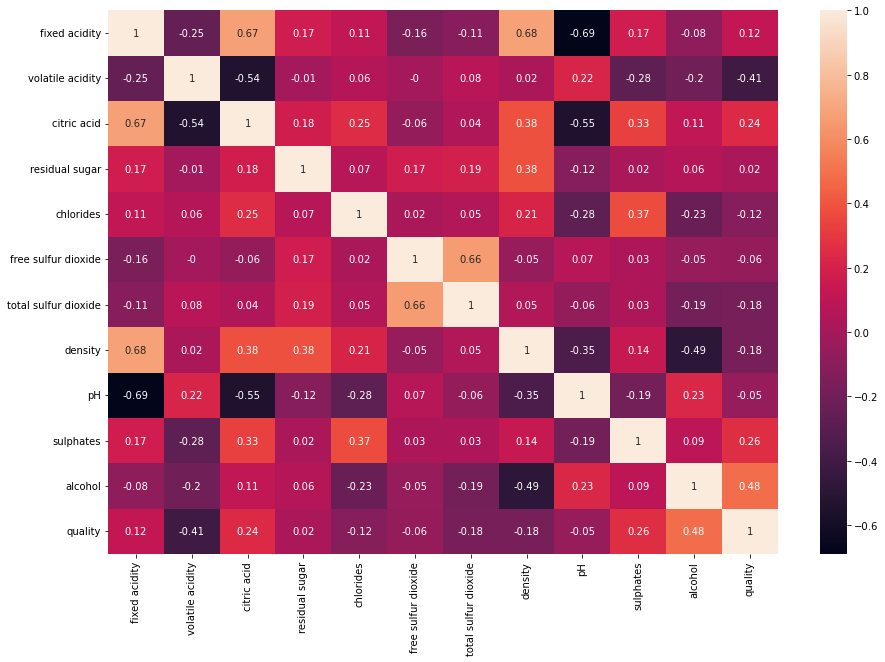

In [453]:
dt5 = dataset5.copy()
dt5 = dt5.drop(dt5.columns[[12]],axis=1)
corr_mat = dt5.corr().round(2)
plt.figure(figsize=(15,10))
plot = sns.heatmap(corr_mat, annot=True)

Une representation alternative a la matrice de corrélation

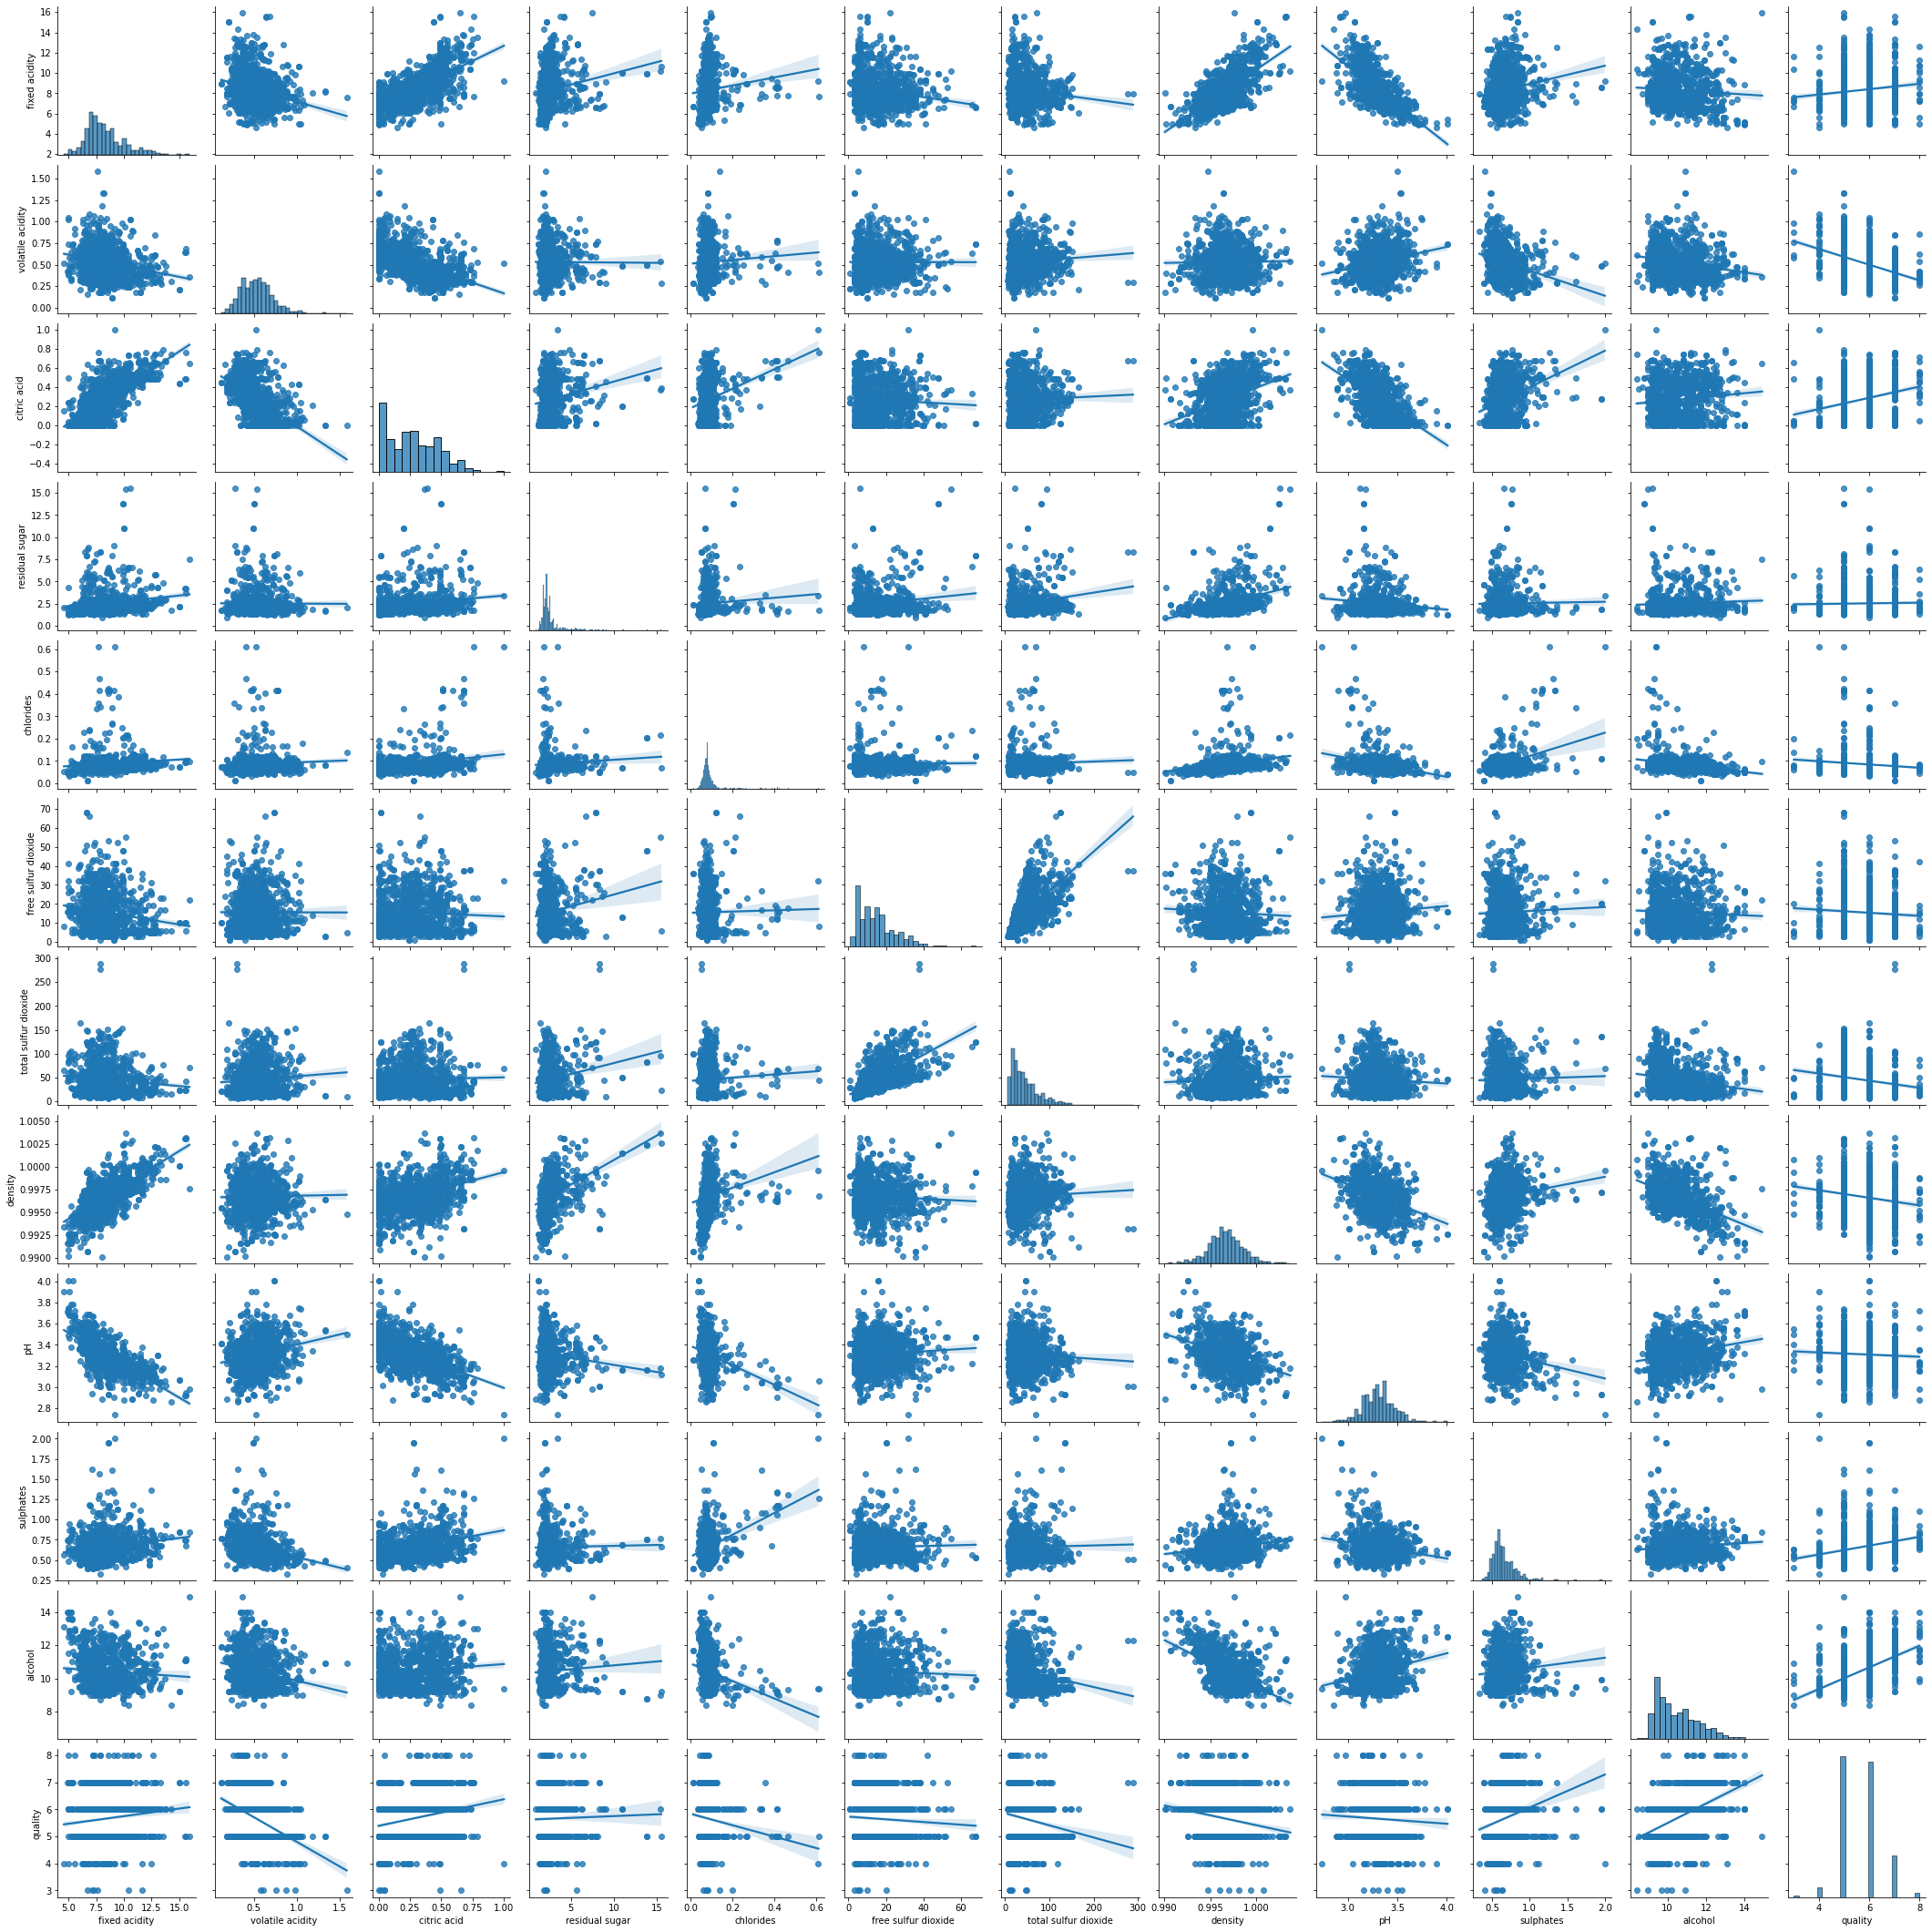

In [454]:
sns.pairplot(dt5, kind='reg')

3.2 Examinez la distribution de chaque attribut (colonne) au sein de l'ensemble de données. Utilisez des histogrammes ou des ,<br>boxplots pour visualiser les distributions, en identifiant les motifs sous-jacents ou les valeurs aberrantes.

On peut voir qu'il y a beaucoup d'attributs qui contiennent des valeurs aberrantes (outliers) ce qui doit etre regler dans le pretraitement.

<AxesSubplot:xlabel='quality', ylabel='density'>

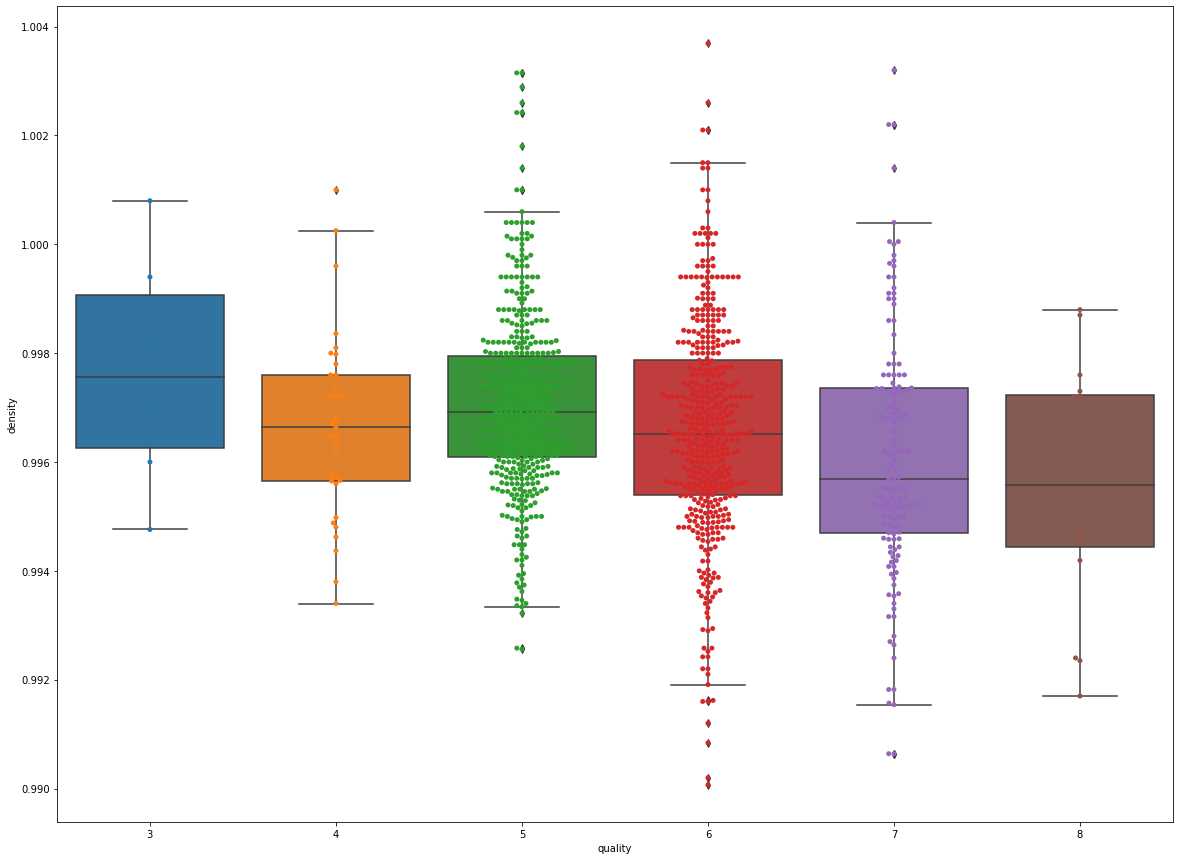

In [455]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="density") # La difference de densite est negligeable
sns.swarmplot(data=dt5, x="quality", y="density")


<AxesSubplot:xlabel='quality', ylabel='pH'>

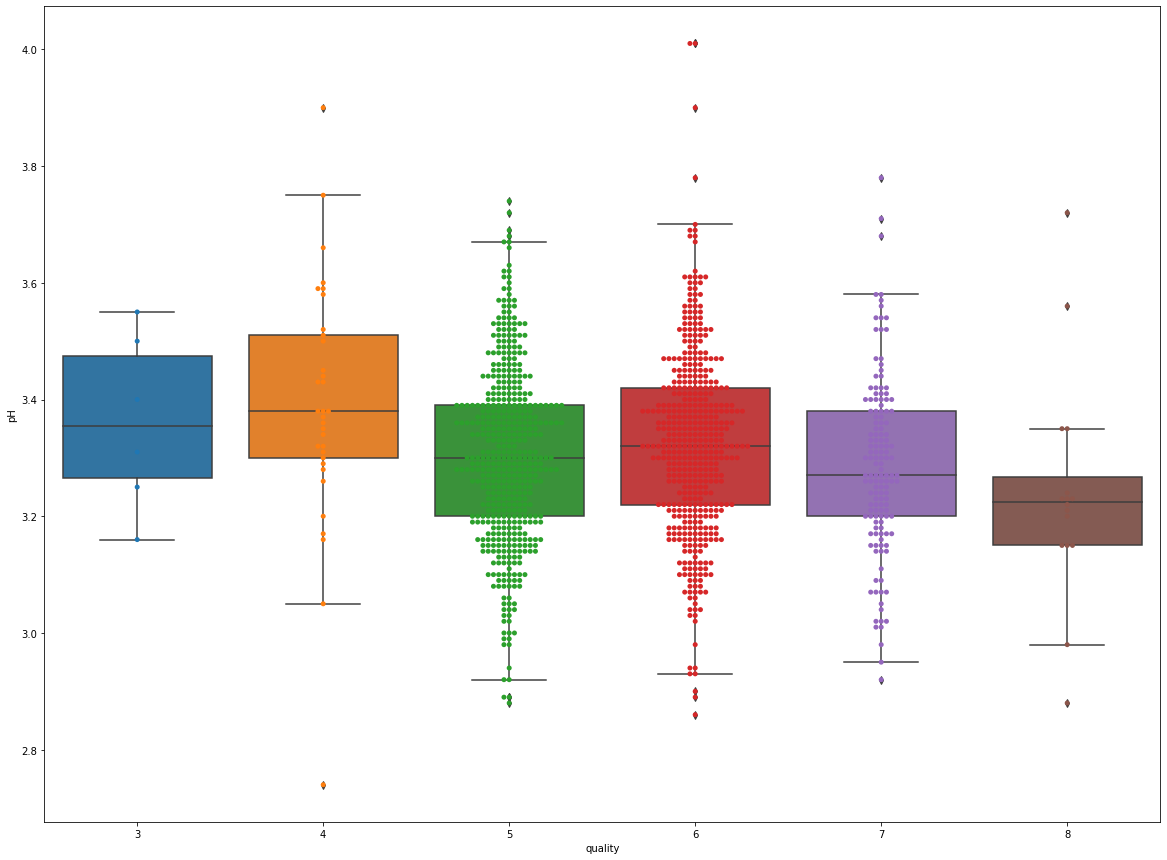

In [456]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="pH")
sns.swarmplot(data=dt5, x="quality", y="pH")

/Users/jeribiadam/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

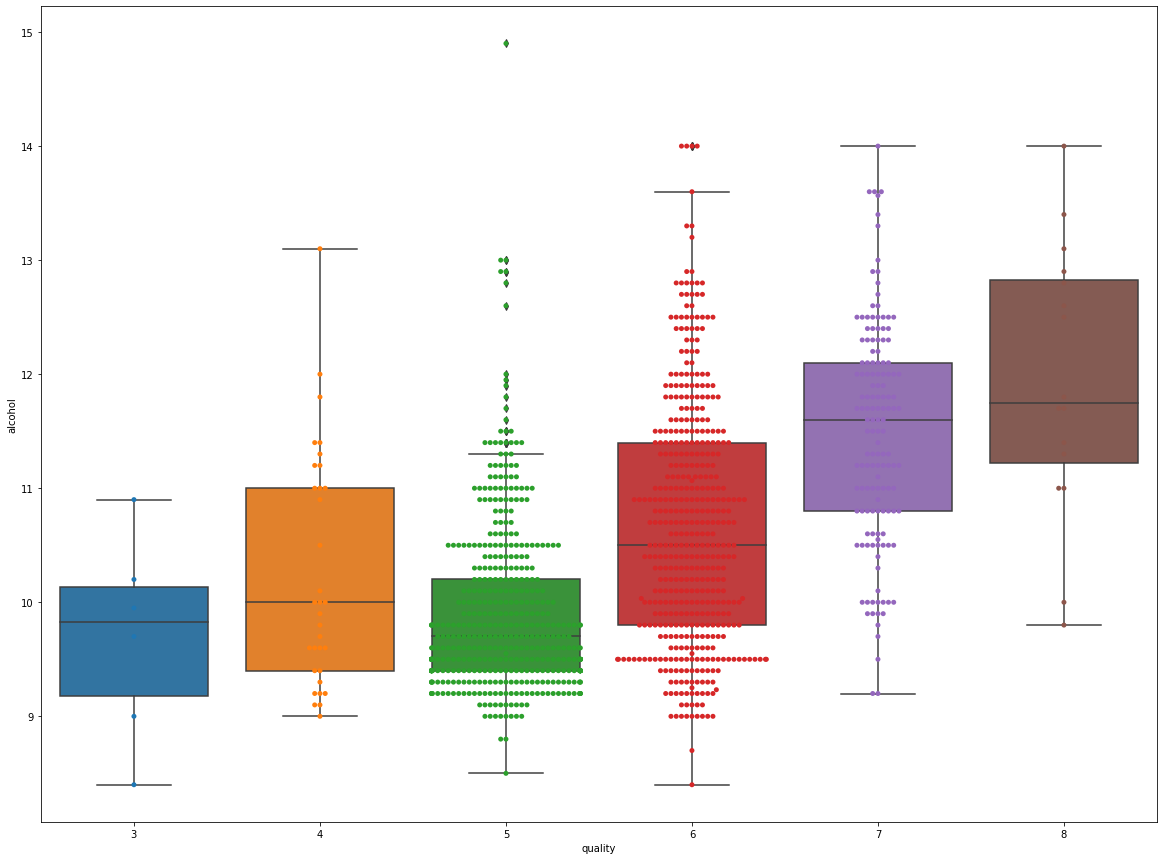

In [457]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="alcohol")
sns.swarmplot(data=dt5, x="quality", y="alcohol")

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

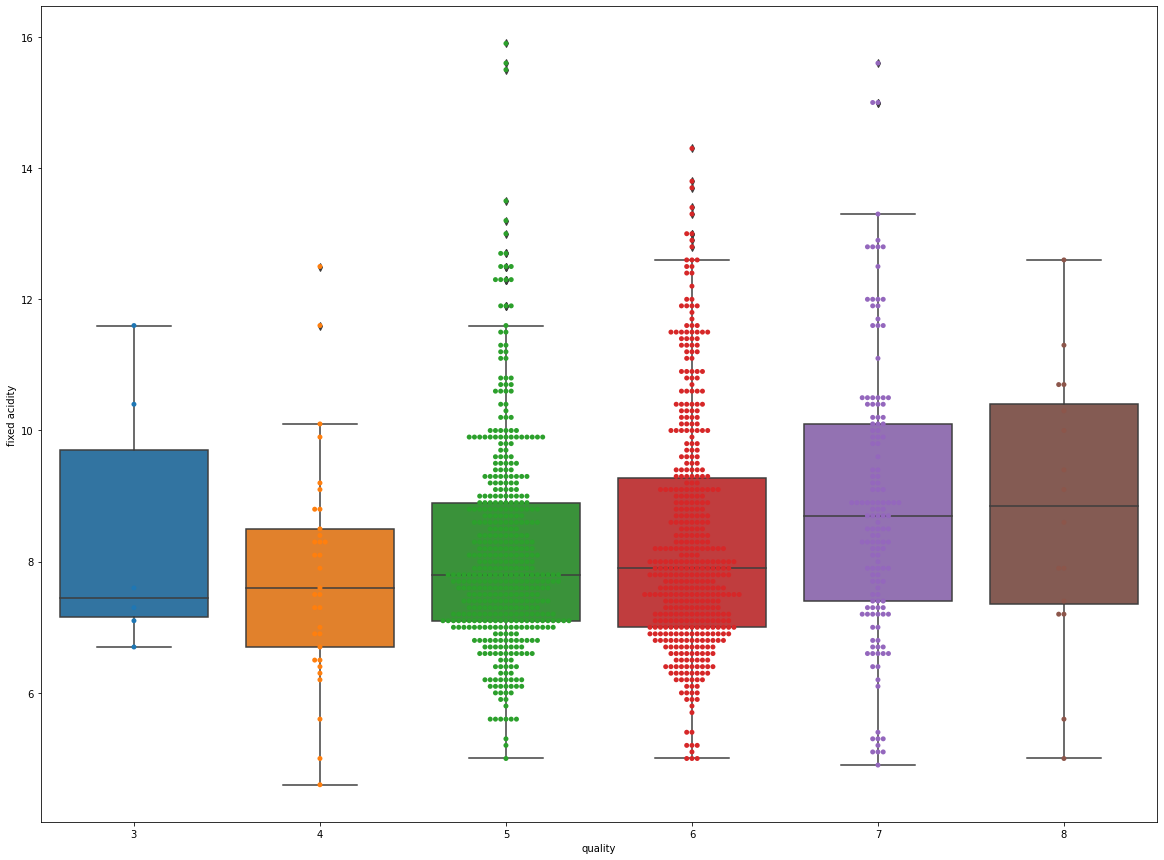

In [458]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="fixed acidity")
sns.swarmplot(data=dt5, x="quality", y="fixed acidity")


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

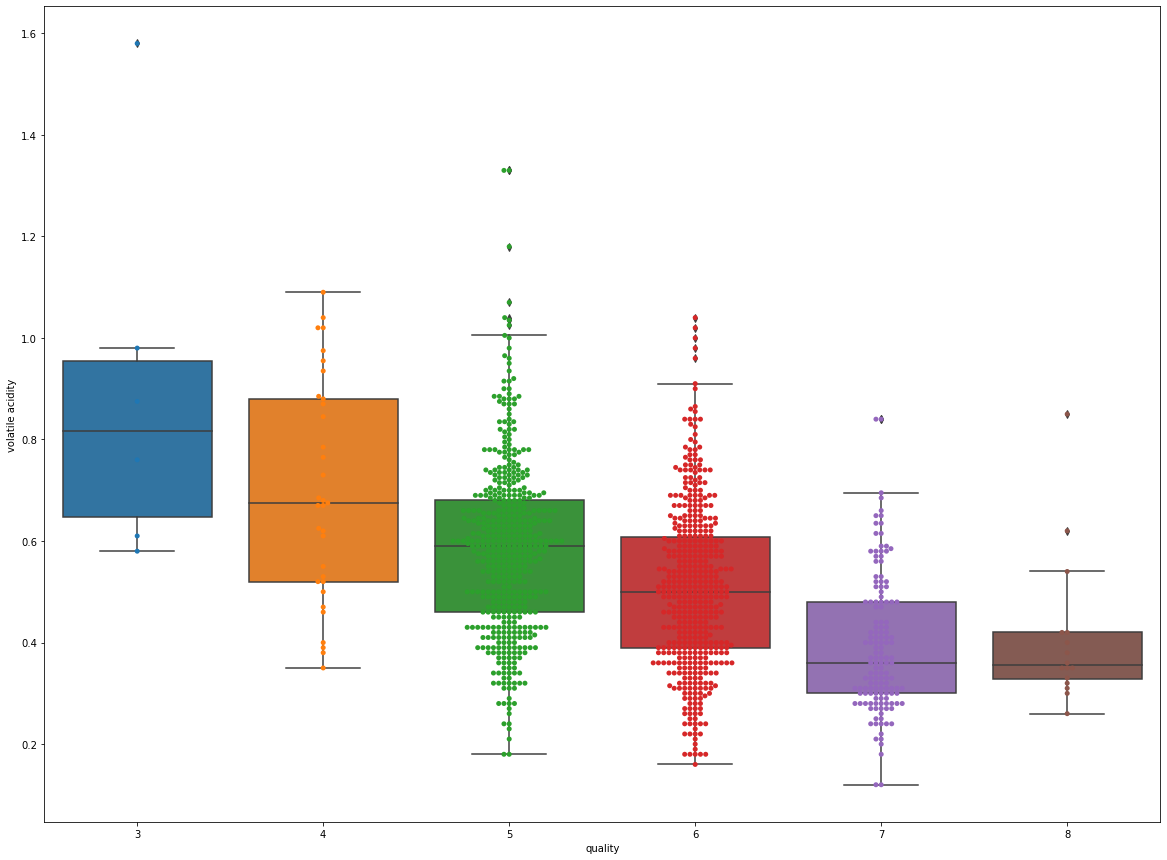

In [459]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="volatile acidity")
sns.swarmplot(data=dt5, x="quality", y="volatile acidity")


<AxesSubplot:xlabel='quality', ylabel='citric acid'>

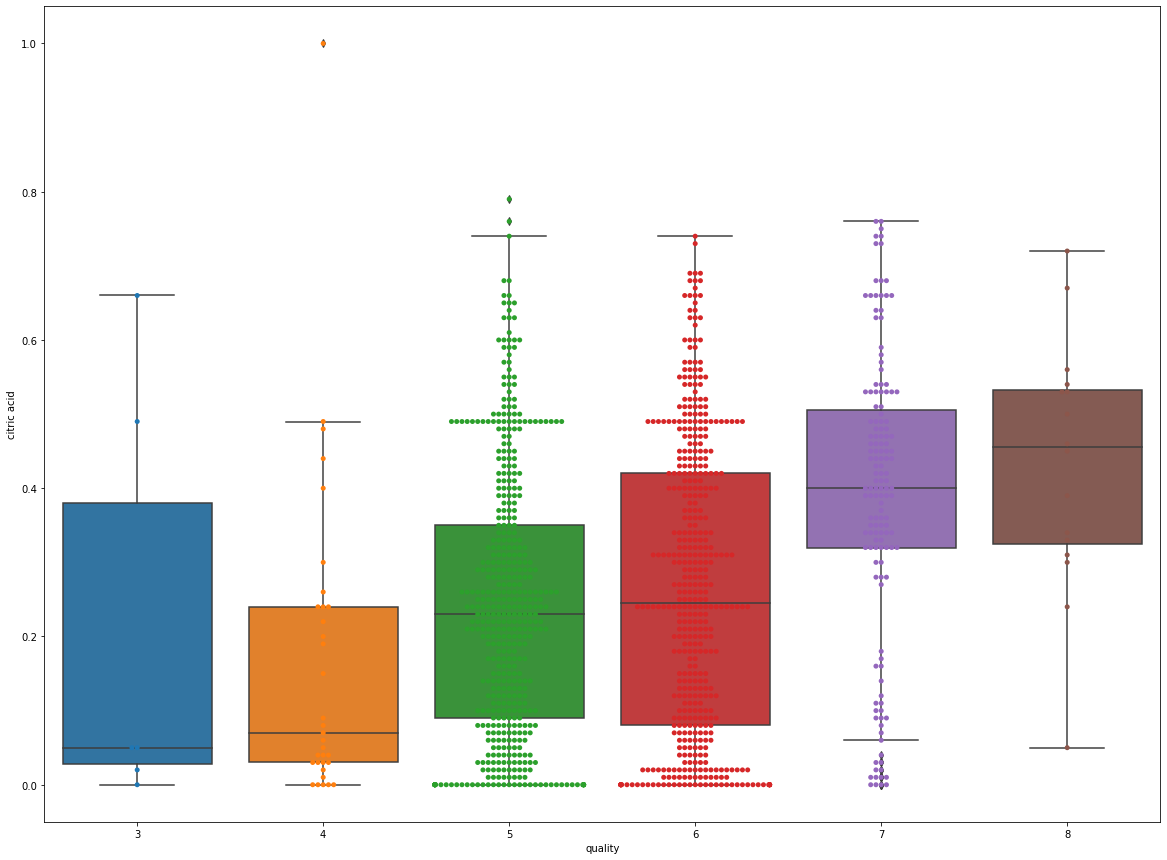

In [460]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="citric acid")
sns.swarmplot(data=dt5, x="quality", y="citric acid")



<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

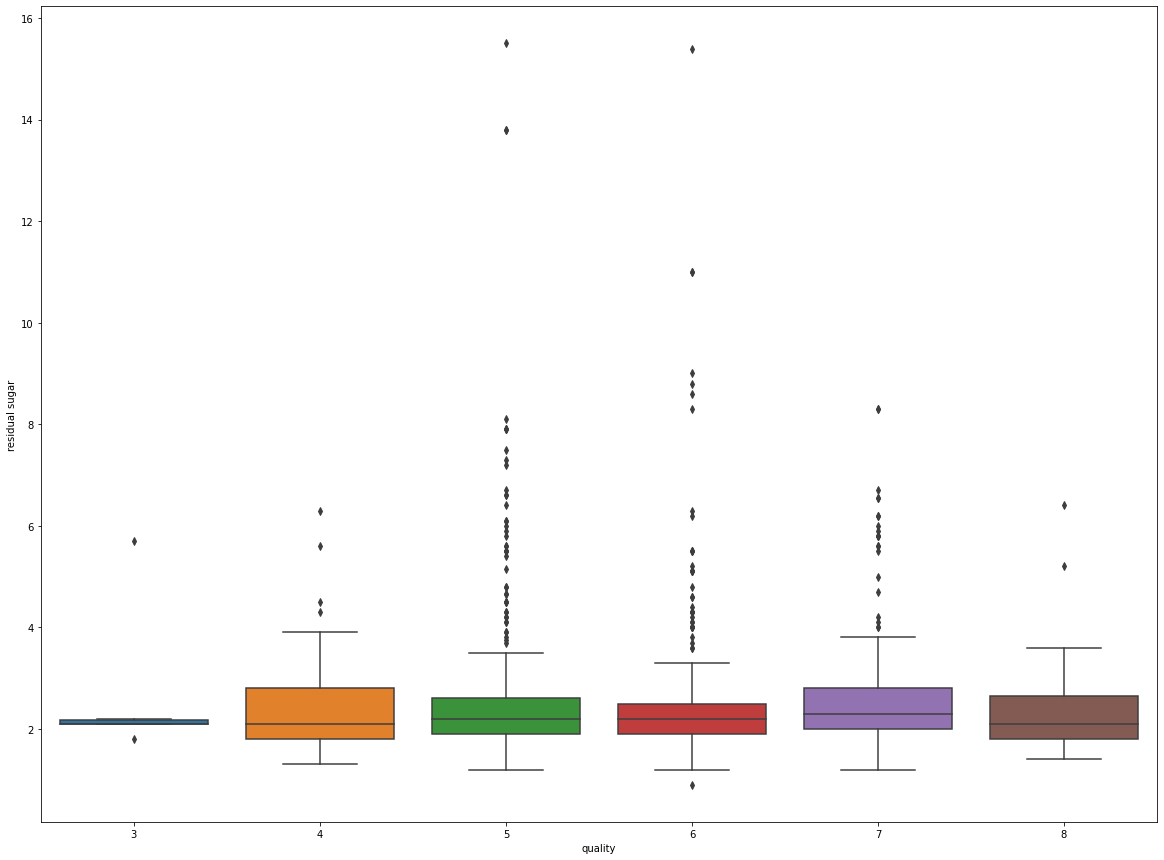

In [461]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="residual sugar")



<AxesSubplot:xlabel='quality', ylabel='chlorides'>

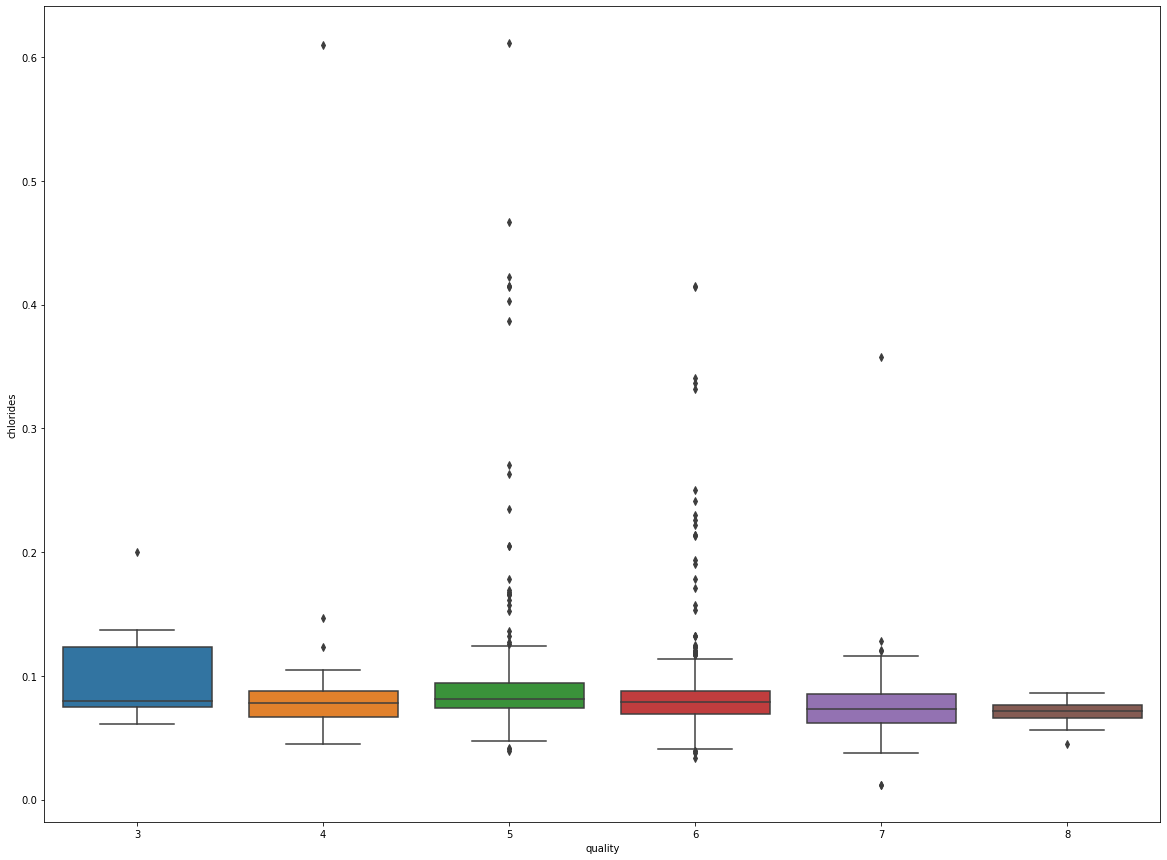

In [462]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="chlorides")

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

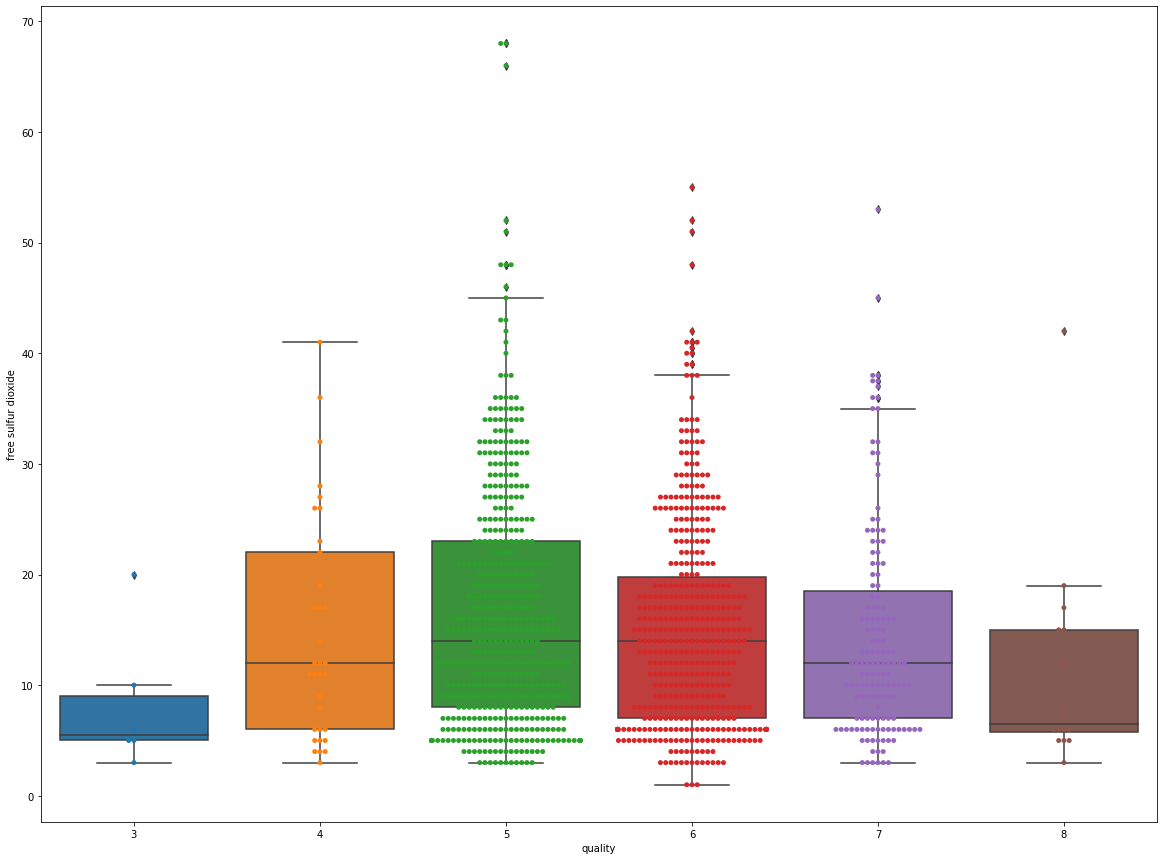

In [463]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="free sulfur dioxide")
sns.swarmplot(data=dt5, x="quality", y="free sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

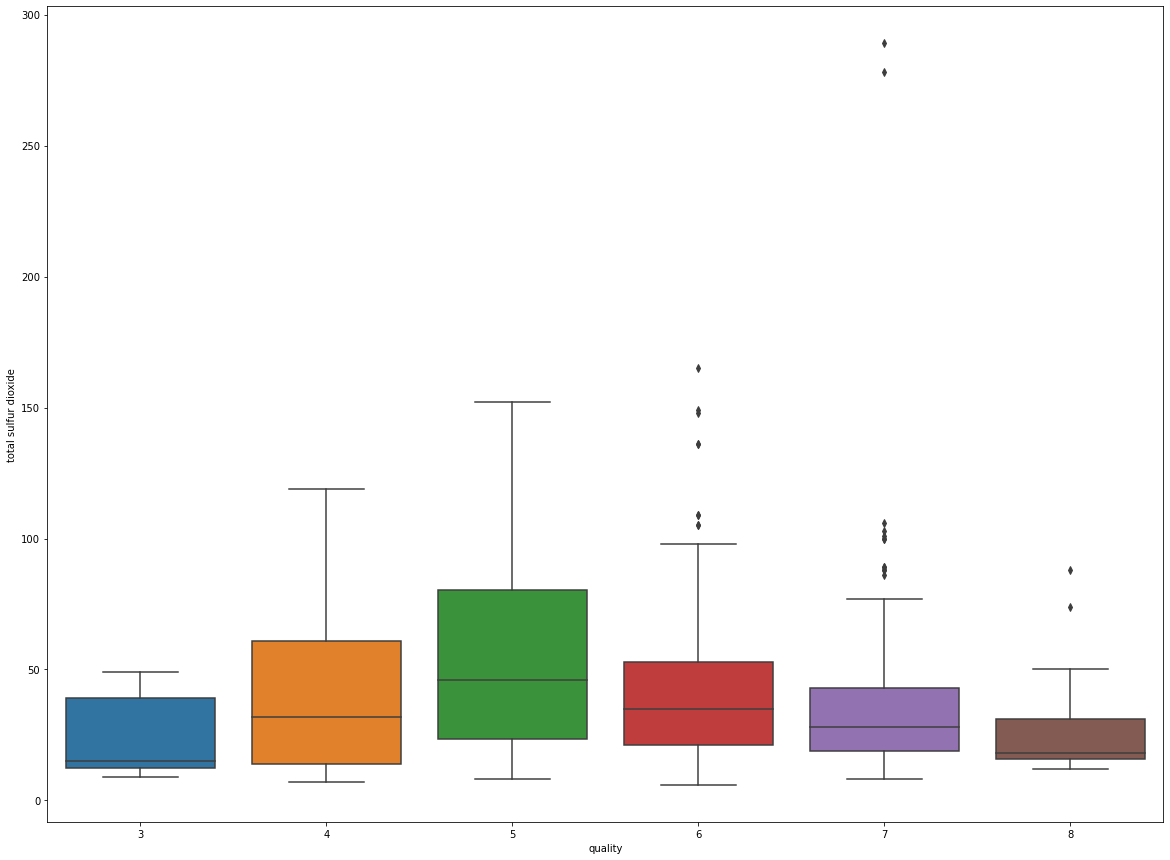

In [464]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="total sulfur dioxide")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

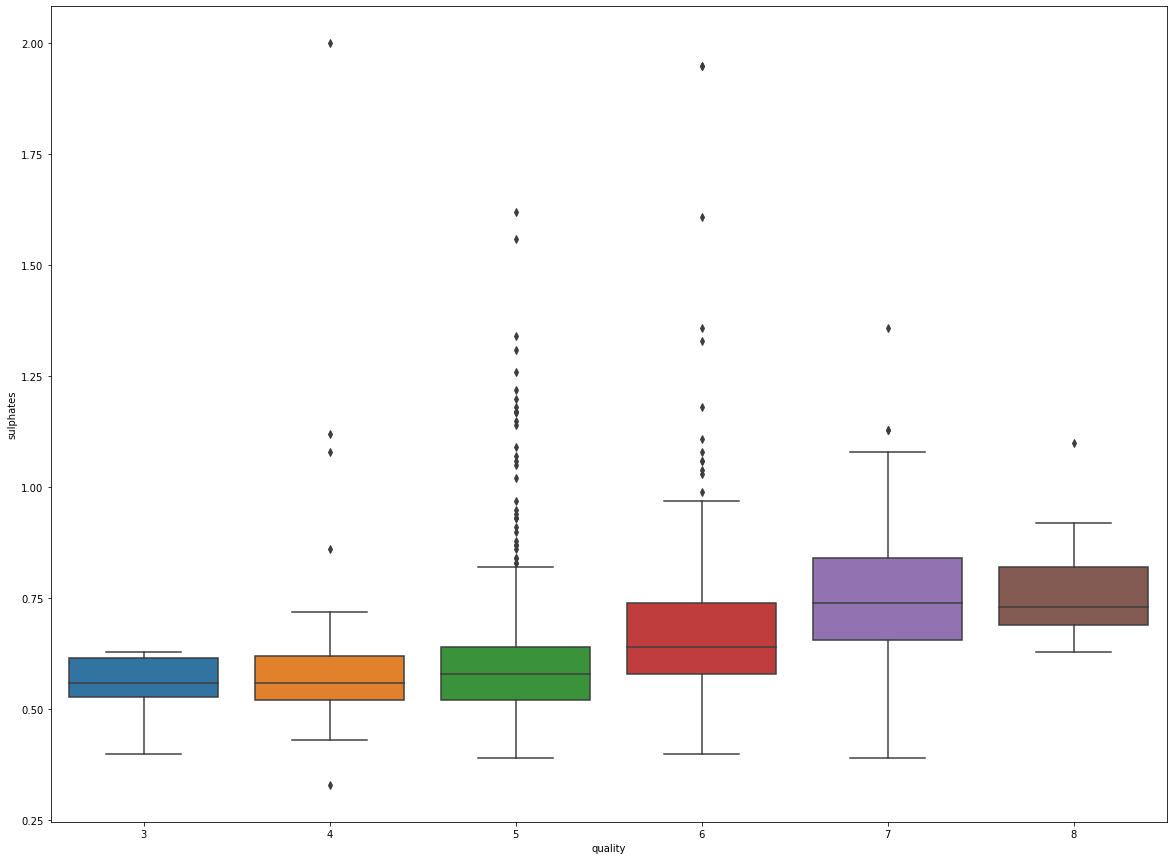

In [465]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=dt5, x="quality", y="sulphates")

4. **Analyse de la distribution des classes** : Examinez la distribution des étiquettes de classe au sein jeu de données. Utilisez des diagrammes en barres pour visualiser la fréquence des instances pour chaque classe et évaluez si l'ensemble de données est équilibré ou déséquilibré.


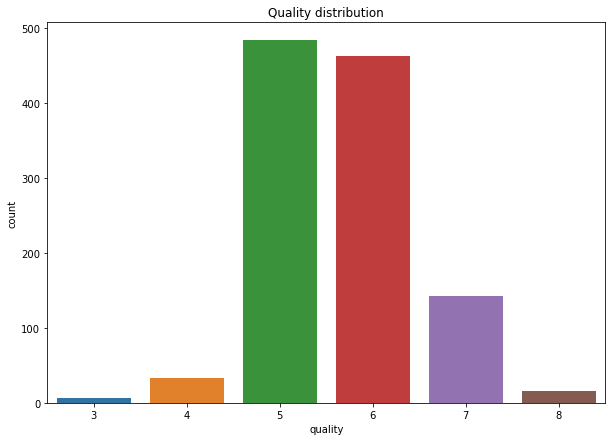

In [466]:
# Distribution des valeurs :  
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='quality', data=dt5)
plt.title('Quality distribution')
plt.show()

Comme on peut voir du diagramme en barres si-dessus, la distrubution des donnees est tres déséquilibré. 
Explication : il y a environ 470 exemple de qualite 5, 450 exemple de qualite 6, 150 exemple de qualite 7, 40 exemple de qualite 4, 20 exemple de qualite 8, 5 exemple de qualite 3 et pas d'exemple de qualite 0,1,2,9 ou 10 qui existe dans ce dataset. Ca montre que plus que 80% des lignes/donnees ont une qualite de 5 ou 6 alors que moins de 20% des donnees ont une qualite de 3,4,7,8 et aucune donnees a une qualite de 0,1,2,9 ou 10. 

5. **Prétraitement** : 

    5.1 Pour les attributs numériques, déterminez la meilleure transformation à utiliser. Indiquez la transformation qui semble appropriée et pourquoi. Incluez le code illustrant comment appliquer la transformation. Pour au moins un attribut, montrez la distribution avant et après la transformation. Voir [Prétraitement des données](https://scikit-learn.org/stable/modules/preprocessing.html).


## QuantileTransformer :
Comme ce dataset contient beaucoup de valeurs aberrantes (outliers) dans presque tous les attributs, la meilleure transformation serait le QuantileTransformer qui va nous aider a obtenir une distrubution uniforme.

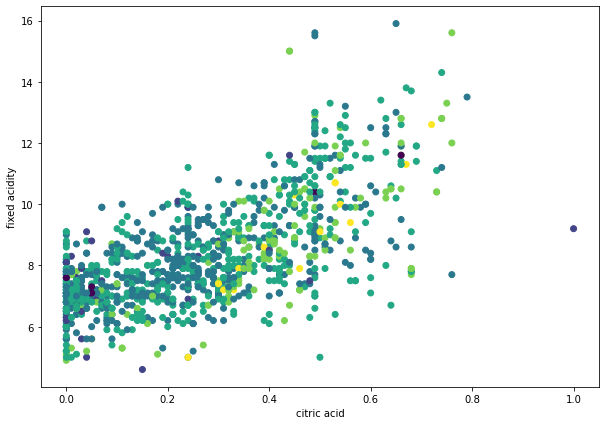

In [467]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel(dt5.columns[2])
ax.set_ylabel(dt5.columns[0])
y = dt5['quality'] 
X = dt5.drop(["quality"],axis=1)
X = X.values
plt.scatter(X[:,2], X[:,0], c=y)

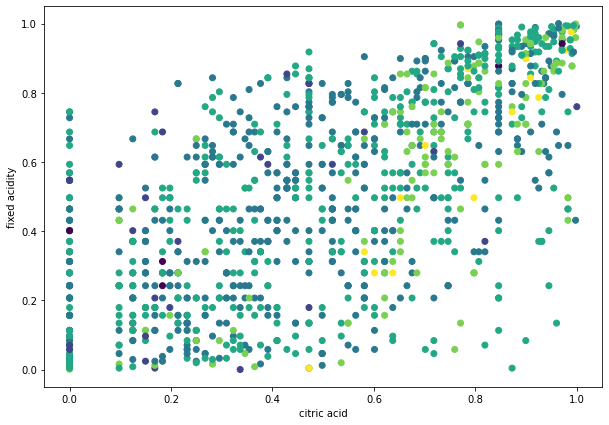

In [468]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel(dt5.columns[2])
ax.set_ylabel(dt5.columns[0])
X_new = QuantileTransformer(output_distribution='uniform').fit_transform(X)
plt.scatter(X_new[:,2], X_new[:,0], c=y)

 5.2 Pour les attributs catégoriels, montrez comment appliquer [l'encodage one-hot](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Si votre ensemble de données ne contient pas de données catégorielles, montrez comment appliquer l'encodeur one-hot à l'étiquette (variable cible).

Puisque mon ensemble de données ne contient pas de données catégorielles, ce n'est pas necessaire d'utiliser oneHotEncoder. Cependant, voici l'implementation du oneHotEncoder sur la variable cible comme c'est demandee dans la question

In [469]:
encoder = OneHotEncoder(sparse=False)  
one_hot_labels = encoder.fit_transform(dt5[['quality']])
one_hot_labels

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

On remarque que les valeurs de l'attribut "qualite" qui varient de 3 a 8 dans ce dataset ont ete remplacee avec le oneHotEncoder par 
[1,0,0,0,0,0] = 3 , [0,1,0,0,0,0] = 4 ... [0,0,0,0,1,0] = 7, [0,0,0,0,0,1] = 8

6. **Données d'entraînement et cible** : Définissez la variable Python `X` pour désigner les données et `y` pour désigner la classe cible. Assurez-vous de sélectionner uniquement les caractéristiques informatives.


In [470]:
X = X_new # Données d'entraînement
y = dt5['quality'] # cible (target value)

7. **Ensembles d'entraînement et de test** : Divisez l'ensemble de données en ensembles d'entraînement et de test. Réservez 20 % des données pour les tests.


In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% des donnees seront pour l'entrainement et 20% pour effectuer les tests

## Resultats de test : 

In [472]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN model accuracy : ", metrics.accuracy_score(y_test, y_pred))

KNN model accuracy :  0.6200873362445415


--------------------------------------------------------------------------

# Références

Assurez-vous de fournir des références à TOUTES les sources utilisées (articles, code, algorithmes).

## Transcription AI
**Indice :** Pour partager un lien vers votre notebook Colab, cliquez sur "share" en haut à droite. Ensuite, sous *Accès général*, changez *Restreint* en "Toute personne avec le lien".

## Articles

### Exploratory Data Analysis of Wine Quality: [View Article](https://ttsteiger.github.io/projects/wine_report.html)

### Dealing with Outliers: [View Article](https://syedabis98.medium.com/dealing-with-outliers-in-data-science-techniques-and-best-practices-a08172643b7a)

### Total Sulfur Dioxide – Why it Matters, Too!: [View Article](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/)

---

## Documentation

### scikit-learn:
- [Imputation of Missing Values](https://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values)
- [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
- [Imputation](https://scikit-learn.org/stable/modules/impute.html)
- [Nearest Centroid Classifier](https://scikit-learn.org/stable/modules/neighbors.html#nearest-centroid-classifier)

### pandas:
- [User Guide](https://pandas.pydata.org/docs/user_guide/)

### numpy:
- [Introduction to NumPy](https://www.w3schools.com/python/numpy/numpy_intro.asp)

### seaborn:
- [Seaborn Documentation](https://seaborn.pydata.org)

### matplotlib:
- [Matplotlib Documentation](https://matplotlib.org)
